* 지하철 이용현황 공공데이터 분석 프로젝트

In [1]:
import pandas as pd

In [2]:
# 파일 불러오기
# 일자/노선/지하철역별 승하차고객수. 19년 상반기(19년 1월 ~ 19년 6월)
# 작업할 여러 개의 파일 중 하나의 파일 불러오기

path = './데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT2)Subway_Analysis/rawfiles/CARD_SUBWAY_MONTH_201901.csv'
raw = pd.read_csv(path)     # 오류발생시 encoding = 'cp949' 추가
raw

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104
...,...,...,...,...,...,...,...
18329,20190131,1호선,155,동대문,14563,15139,20190203
18330,20190131,1호선,154,종로5가,30249,29703,20190203
18331,20190131,1호선,153,종로3가,36804,35050,20190203
18332,20190131,1호선,152,종각,51970,50080,20190203


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18334 non-null  int64 
 1   노선명     18334 non-null  object
 2   역ID     18334 non-null  int64 
 3   역명      18334 non-null  object
 4   승차총승객수  18334 non-null  int64 
 5   하차총승객수  18334 non-null  int64 
 6   등록일자    18334 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1002.8+ KB


#### 데이터 파일 읽기: read_excel / read_csv
* pd.read_excel('파일경로+파일명.xlsx')
* pd.read_csv('파일경로+파일명.csv', encoding = 'utf-8')
* pd.read_csv('파일경로+파일명.csv', encoding = 'cp949')     # ms엑셀에서 저장한 경우

#### 자주 사용하는 옵션
* pd.read_excel('파일경로', 옵션1 = 값1, 옵션2 = 값2...)
* 옵션 종류
    * index_col = 컬럼인덱스번호 # 몇 번째 칼럼을 인덱스로 지정할 것인지 선택
    * header = row인덱스번호 # 몇번째 row부터 표 데이터로 볼 것인지 선택
    * thousands = ',' # 천 단위 기호 , 사용되어 있을 시 사용. 엑셀에서 통화로 xxx,xxx 이렇게 표현되어 있을 땐 object로 인식됨. 이때 이 옵션을 쓰면 숫자로 인식됨

In [4]:
# 파일 2개 불러와서 합치기

raw = pd.DataFrame()     # 빈 데이터 셋 만들기

# 첫 번째 파일

path = './데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT2)Subway_Analysis/rawfiles/CARD_SUBWAY_MONTH_201901.csv'
temp = pd.read_csv(path)
raw = raw.append(temp)     # 추가하기
# raw.head()

# 두 번째 파일

path = './데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT2)Subway_Analysis/rawfiles/CARD_SUBWAY_MONTH_201902.csv'
temp = pd.read_csv(path)
raw = raw.append(temp)     # 추가하기
# raw.head()
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34877 entries, 0 to 16542
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    34877 non-null  int64 
 1   노선명     34877 non-null  object
 2   역ID     34877 non-null  int64 
 3   역명      34877 non-null  object
 4   승차총승객수  34877 non-null  int64 
 5   하차총승객수  34877 non-null  int64 
 6   등록일자    34877 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


#### 폴더에 있는 모든 파일을 불러와서 병합하기

In [5]:
# 폴더/파일을 관리하는 os라이브러리

import os

In [6]:
# os.listdir()을 이용해 rawfiles 폴더에 있는 파일 리스트 보기

dirpath = './데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT2)Subway_Analysis/rawfiles'
files = os.listdir(dirpath)
files

['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [7]:
# 여러개의 파일 병합

# 빈 데이터프레임 준비

raw = pd.DataFrame()

# 파일 하나씩 불러들여 합치기

for file in os.listdir('./데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT2)Subway_Analysis/rawfiles'):
    # print(file)
    fpath = './데이터분석/인강/6. 러닝스푼즈_포트폴리오/파이썬 기초 강의자료/PJT2)Subway_Analysis/rawfiles/' + file
    # print(fpath)
    temp = pd.read_csv(fpath)
    raw = raw.append(temp, ignore_index = True)     # ignore_index = True는 기존 인덱스 무시

In [8]:
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [9]:
raw.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
99337,20190630,2호선,204,을지로4가,4940,4668,20190703
99338,20190630,2호선,203,을지로3가,12043,11854,20190703
99339,20190630,2호선,202,을지로입구,31622,29723,20190703
99340,20190630,2호선,201,시청,10178,8214,20190703
99341,20190630,1호선,159,동묘앞,13859,14352,20190703


In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.3+ MB


In [11]:
raw.describe()

,사용일자,역ID,승차총승객수,하차총승객수,등록일자
count,9.934200e+04,99342.000000,99342.000000,99342.000000,9.934200e+04
mean,2.019037e+07,1882.914759,12548.696392,12497.450605,2.019038e+07
std,1.766476e+02,1179.037450,13054.465868,13275.053056,1.783979e+02
min,2.019010e+07,150.000000,1.000000,0.000000,2.019010e+07
25%,2.019021e+07,1030.000000,4129.000000,3943.000000,2.019022e+07
50%,2.019040e+07,1812.000000,8772.000000,8493.500000,2.019041e+07
75%,2.019052e+07,2634.000000,16421.000000,16369.000000,2.019052e+07
max,2.019063e+07,4713.000000,132727.000000,139617.000000,2.019070e+07


#### 요일 추가

In [12]:
# 일시를 관리하는 datetime 라이브러리

from datetime import datetime

* datetime.strptime('날짜str', str형태): 문자 -> 날짜 타입
    - str형태 %Y-%m-%d %H:%M:%S
    - %Y : 연도(4자리)
    - %m : 월(2자리)
    - %d : 일자(2자리)
    - %H : 시간
    - %M : 분
    - %S : 초

In [13]:
# str타입을 날짜 타입으로 변경: datetime.strptime()

date_str = str(20210811)     # 숫자가 아닌 문자로 입력해야 함
date = datetime.strptime(date_str, '%Y%m%d')
date

datetime.datetime(2021, 8, 11, 0, 0)

In [14]:
# 날짜 타입을 요일로 변경: weekday()
# 월요일 = 0 ~ 일요일 = 6

weekday = date.weekday()
weekday

2

* 2는 수요일

In [15]:
# 날짜 칼럼을 불러와서 순서대로 요일을 확인하고 리스트에 저장

weekday_dict = ['월', '화', '수', '목', '금', '토', '일']
weekday_list = []

for date_str in raw['사용일자']:
    date = datetime.strptime(str(date_str), '%Y%m%d')
    weekday_index = date.weekday()
    weekday = weekday_dict[weekday_index]
    weekday_list .append(weekday)

In [16]:
# 요일 칼럼 추가

raw['요일'] = weekday_list
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화
1,20190101,경춘선,1322,상천,275,114,20190104,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,화
3,20190101,경춘선,1320,대성리,357,271,20190104,화
4,20190101,경춘선,1319,마석,1772,1963,20190104,화


In [17]:
raw.sample(10)     # 랜덤으로 샘플 10개 보여줌

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
14785,20190126,중앙선,1218,원덕,377,390,20190129,토
60149,20190423,5호선,2559,개롱,8023,8251,20190426,화
8652,20190115,5호선,2533,서대문,20918,21516,20190118,화
26893,20190215,분당선,1872,매교,2580,2632,20190218,금
12934,20190122,6호선,2645,석계,14420,14553,20190125,화
6251,20190111,경강선,1510,세종대왕릉,284,266,20190114,금
15342,20190126,2호선,219,삼성(무역센터),43925,44042,20190129,토
91894,20190618,7호선,2736,고속터미널,20220,17974,20190621,화
58705,20190421,9호선2~3단계,4137,둔촌오륜,682,620,20190424,일
58784,20190421,경원선,1914,보산,1721,1970,20190424,일


In [18]:
# 현재 칼럼명 확인

raw.columns

Index(['사용일자', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일'], dtype='object')

In [19]:
# 요일을 사용일자 다음에 나오도록 칼럼 순서 변경

new_columns = ['사용일자', '요일', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자']
raw = raw[new_columns]
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


#### 정리한 데이터 저장

In [20]:
raw.to_excel('./subway_raw.xlsx', index = False)

# Q. 언제 지하철을 가장 많이 이용할까?

In [2]:
# 위에서 정리한 데이터 저장한 것 불러오기

raw = pd.read_excel('./subway_raw.xlsx')
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## Q. 가장 승객이 많은 날짜는?

In [4]:
# pivot_table을 이용해 사용일자/요일별 승차승객수 합계 데이터 정리

data_date = raw.pivot_table(index = ['사용일자', '요일'], values = '승차총승객수', aggfunc = 'sum')
data_date.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [5]:
data_date_sort = data_date.sort_values(by = '승차총승객수', ascending = False)     # 승차총승객수 기준으로 내림차순 정렬
data_date_sort.head()

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472


* 위 결과를 보고 2가지 의문점이 듦<br>
Q1. 5월에 지하철 승객수가 많다?<br>
Q2. 금요일에 지하철 승객수가 많다?

# Q1. 5월에 승객수가 많다?
* 월별 승객수 비교

In [6]:
# 월별 승객수를 비교하기 위해서는 연월 칼럼 필요
# 사용일자 칼럼에서 연월/월일 데이터 추출

yearmonth_list = []
monthday_list = []

for date in raw['사용일자']:
    yearmonth = str(date)[:6]     # 왼쪽부터 6자리 문자 선택
    yearmonth_list.append(yearmonth)
    monthday = str(date)[4:]     # 왼쪽에서 5번째 문자부터 끝까지 선택
    monthday_list.append(monthday)
    
# 연월/월일 칼럼 추가

raw['연월'] = yearmonth_list
raw['월일'] = monthday_list
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [7]:
# 월별 승객수 정렬

data_month = raw.pivot_table(index = '연월', values = '승차총승객수', aggfunc = 'sum')
data_month = data_month.sort_values(by = '승차총승객수', ascending = False)
data_month.head()

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812


- 5월에 승차총승객수가 가장 많은 것을 알 수 있다.

## 무슨 요일에 가장 승객수가 많을까?

In [8]:
# 요일별 승객수 정렬

data_week = raw.pivot_table(index = '요일', values = '승차총승객수', aggfunc = 'sum')
data_week = data_week.sort_values(by = '승차총승객수', ascending = False)
data_week

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


- 금요일이 승차총승객수가 가장 많다.

## 월별 편차 확인

### 월별/일자별 승객수 그래프로 확인

In [11]:
# 한글 표시를 위한 폰트 지정 및 라이브러리 불러오기

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# 한글 폰트 사용

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')

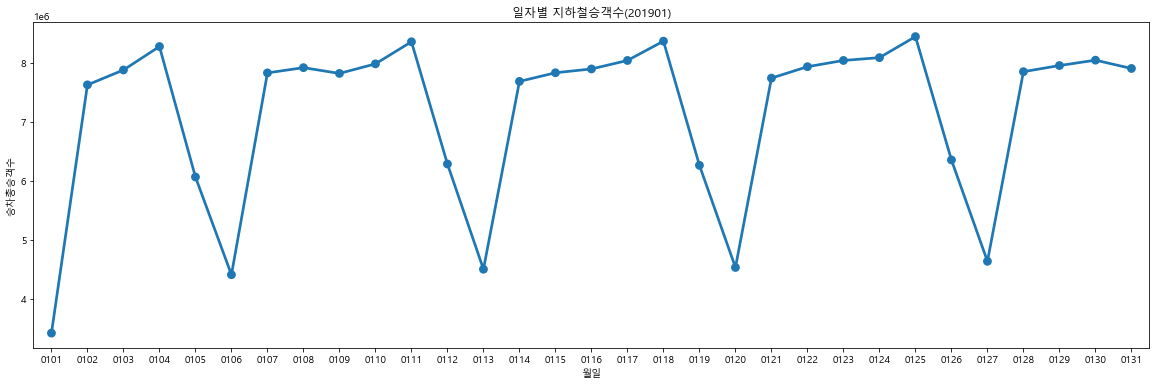

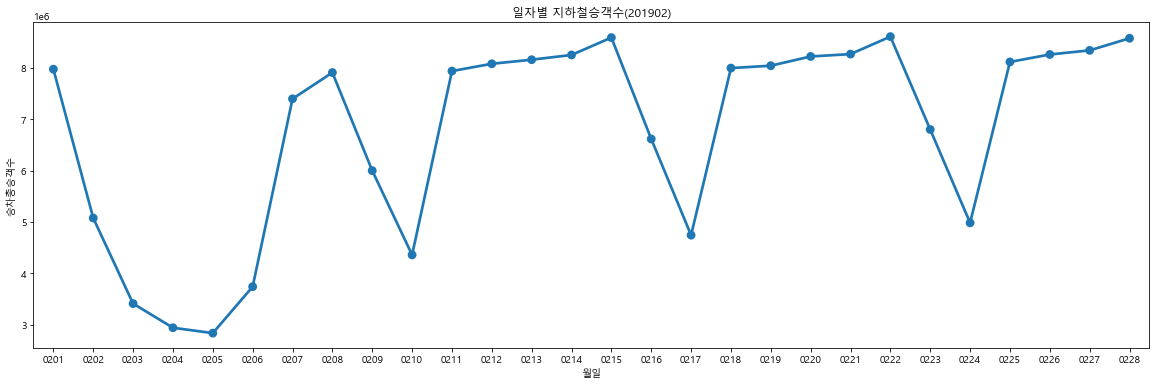

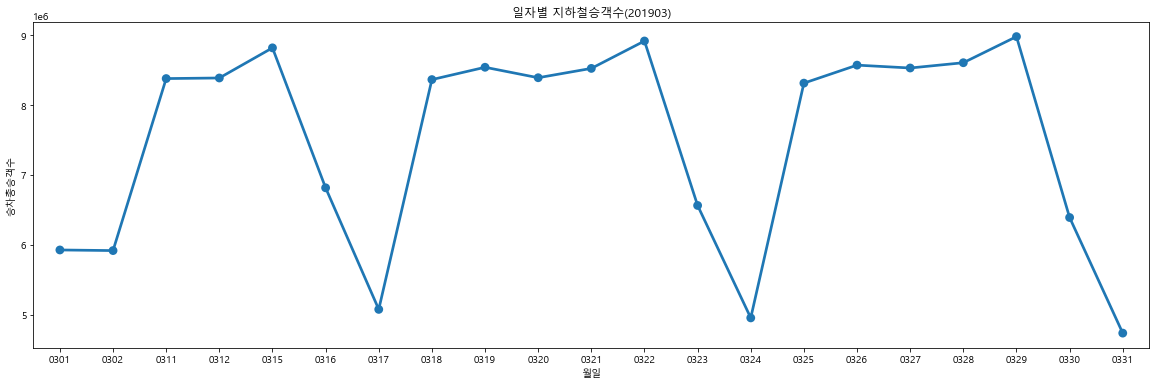

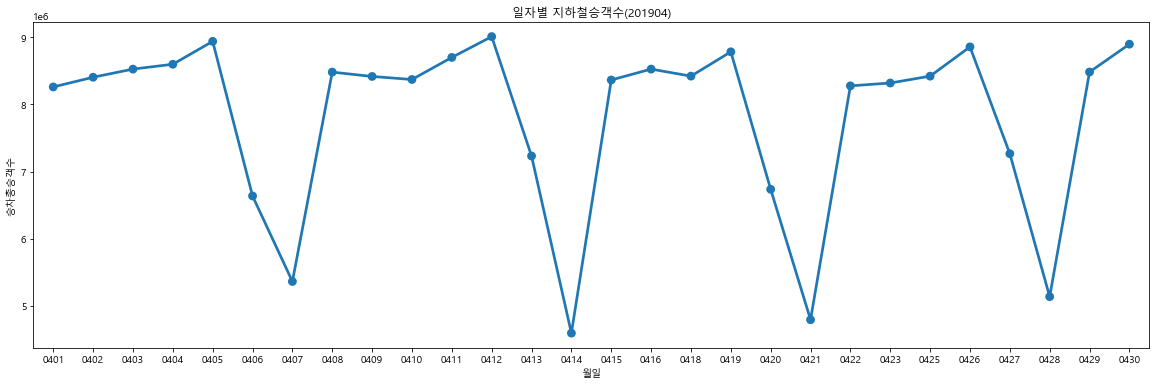

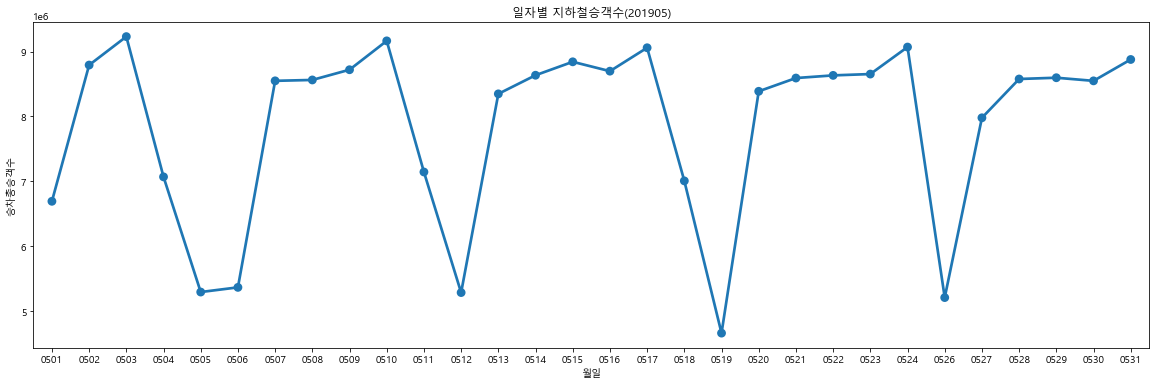

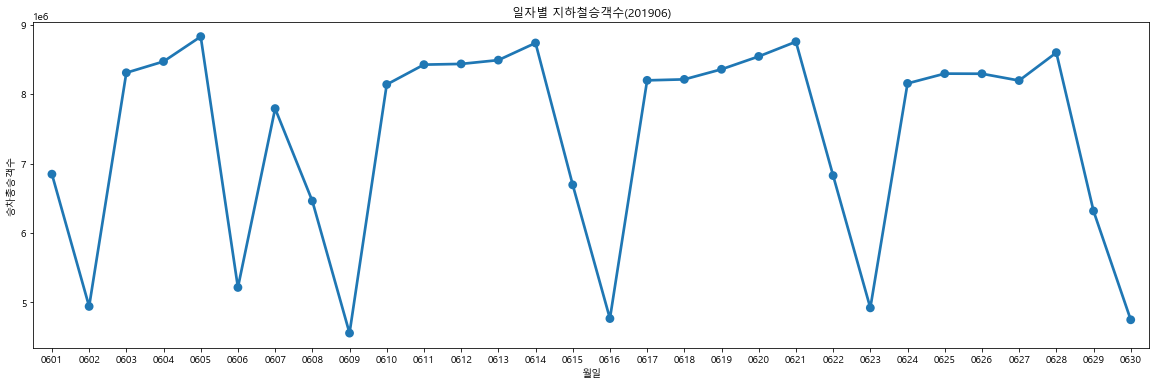

In [18]:
# 월별 일자별 그래프 그리기

for yearmonth in raw['연월'].unique():
    df_selected = raw[raw['연월'] == yearmonth]
    df_pivot = df_selected.pivot_table(index = ['월일', '요일'],
                                      values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot.reset_index()
    
    fig,ax = plt.subplots(figsize = (20, 6))
    
    ax.set_title(f'일자별 지하철승객수({yearmonth})') # 그래프 제목 추가
    
    sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')

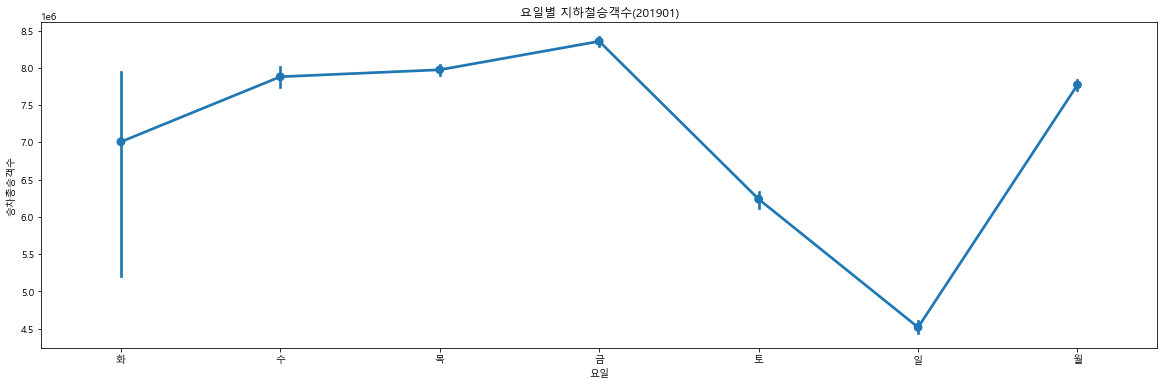

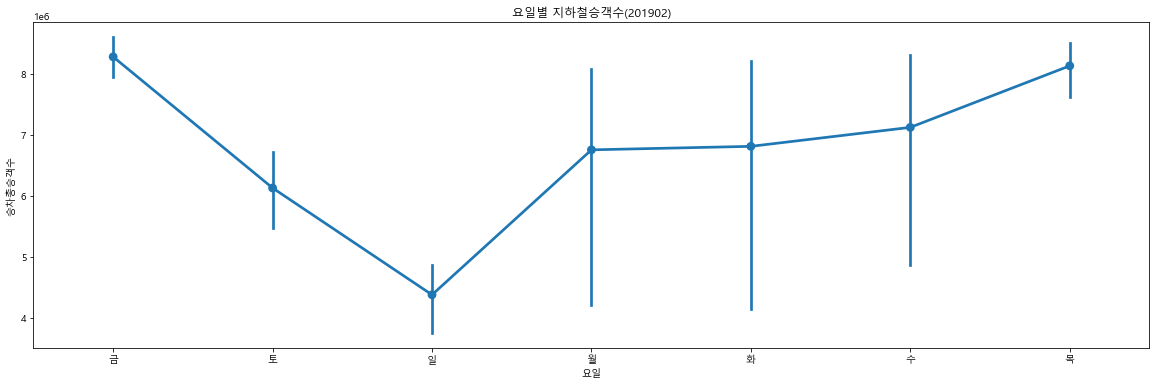

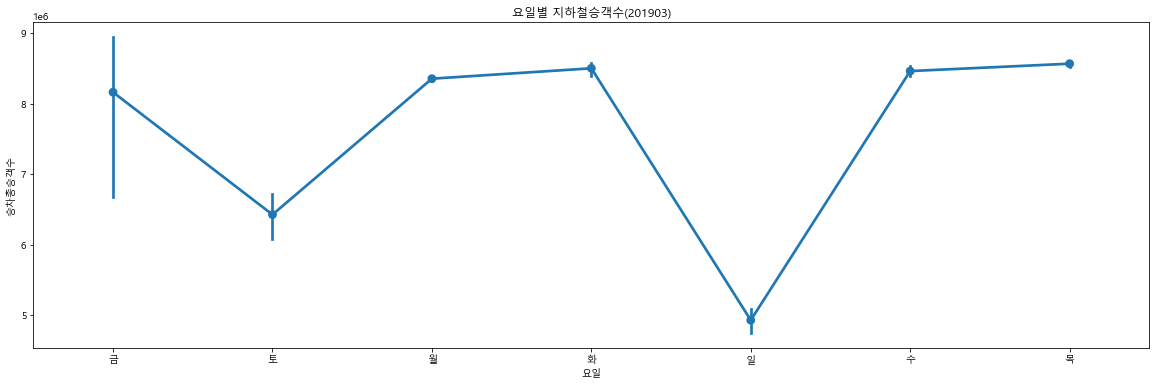

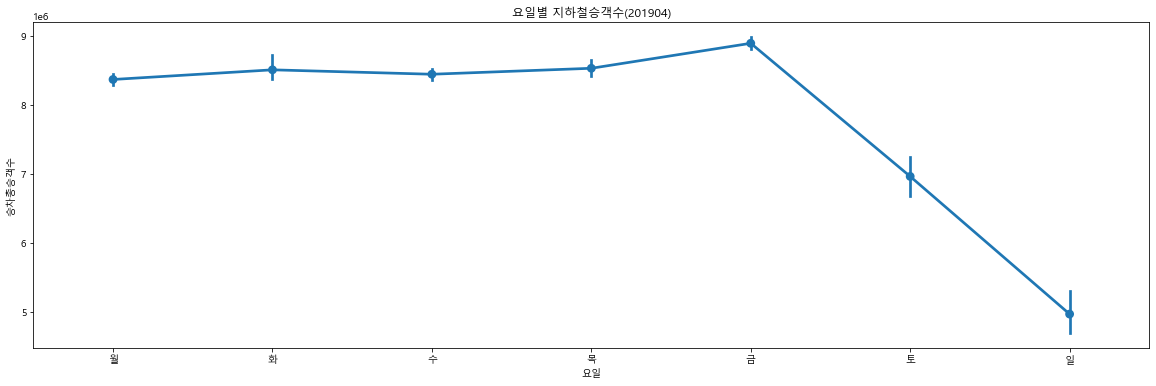

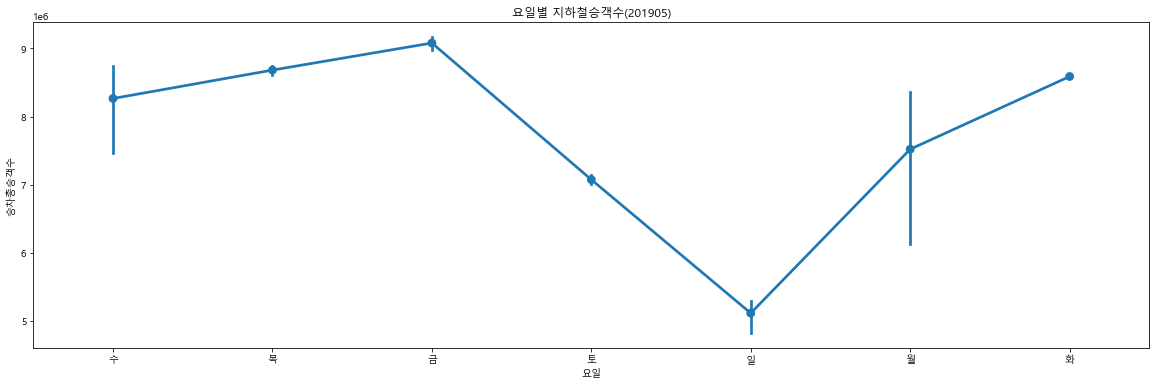

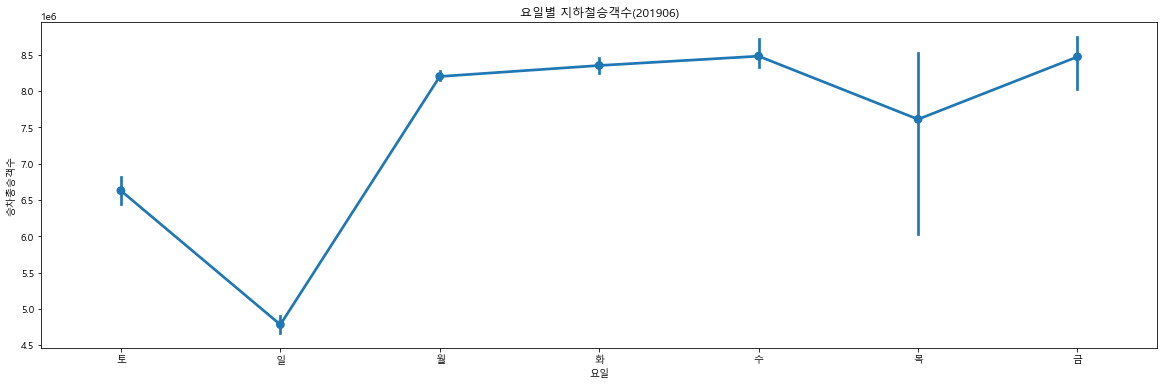

In [20]:
# 요일별 일자별 그래프 그리기

for yearmonth in raw['연월'].unique():
    df_selected = raw[raw['연월'] == yearmonth]
    df_pivot = df_selected.pivot_table(index = ['월일', '요일'],
                                      values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot.reset_index()
    
    fig,ax = plt.subplots(figsize = (20, 6))
    
    ax.set_title(f'요일별 지하철승객수({yearmonth})') # 그래프 제목 추가
    
    sns.pointplot(data = df_pivot, x = '요일', y = '승차총승객수')

## 가장 승객이 많이 타는 역은?

In [21]:
# 역별 승객수

data_station = raw.pivot_table(index = '역명', values = '승차총승객수', aggfunc = 'sum')
data_station = data_station.sort_values(by = '승차총승객수', ascending = False)
data_station.head(10)    # 승차총승객수가 가장 많은 상위 10개 역

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


In [22]:
raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선', '3호선', '1호선',
       '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'], dtype=object)

### 1호선 역별/요일별 승객수 비교

In [23]:
line = '1호선'
data_line = raw[raw['노선명'] == line]

# 노선의 역 순서에 맞춰 정리하기 위해 역ID도 인덱스에 포함
df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns = '요일',
                                values = '승차총승객수', aggfunc = 'sum')
df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]     # 칼럼 순서 정리

df_pivot = df_pivot / 10000     # 만명 단위로 표시

df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [25]:
# 라이브러리 및 한글 폰트 설정

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')

### 히트맵으로 그리기

#### sns.heatmap(data, annot = True, fmt = '.0f', cmap = 'RdBu_r')
- annot = True일 경우 값을 그래프에 표시
- fmt : 값 표시 형태
    - 'f': 실수로 표현(default로 값이 있는 소수자리까지 표시됨)
    - '.0f' : 실수로 표현(소수 0번째 자리까지만 = 정수자리만)
    - '.1f' : 실수로 표현(소수 1번째 자리까지만)
    - '.1%' : 퍼센트(소수 첫번째 자리까지 표시)
- cmap: 색상차트/ ._r로 끝나는 건 색상 방향이 반대

<AxesSubplot:title={'center':'1호선 역별/요일별 승객수'}, xlabel='요일', ylabel='역ID-역명'>

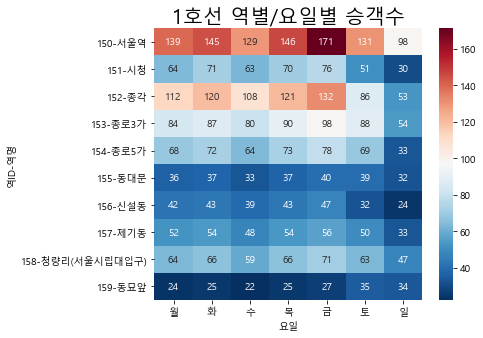

In [26]:
# 1호선 역별/ 요일별 승객수를 히트맵으로 표현

fig, ax = plt.subplots(figsize = (6, 5))     # 그래프 사이즈

plt.title(f'{line} 역별/요일별 승객수', fontsize = 20)     # 그래프 제목

sns.heatmap(df_pivot, cmap = 'RdBu_r', annot = True, fmt = '.0f')

In [27]:
# 1호선 ~ 9호선 노선 리스트 정리

line_seoul_list = []
for line in raw['노선명'].unique():
    if line[1:] == '호선':
        line_seoul_list.append(line)
line_seoul_list

['2호선', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '1호선']

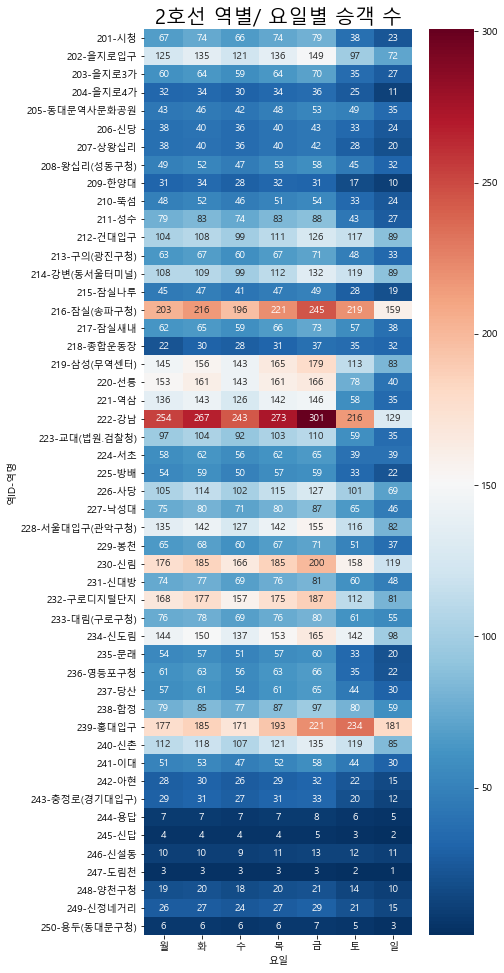

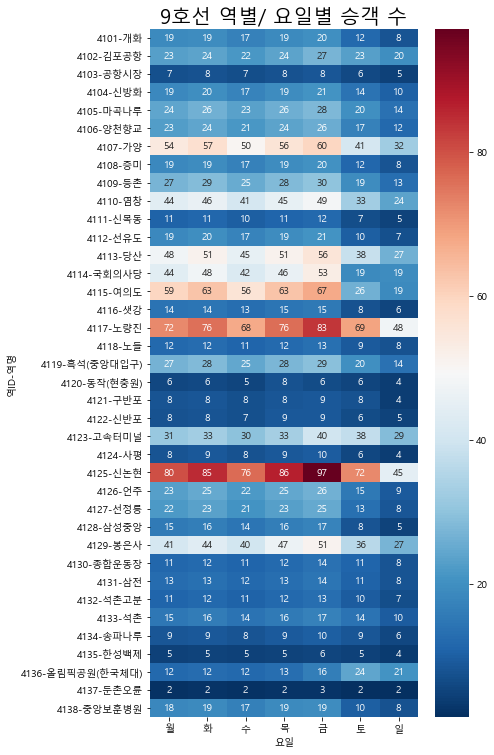

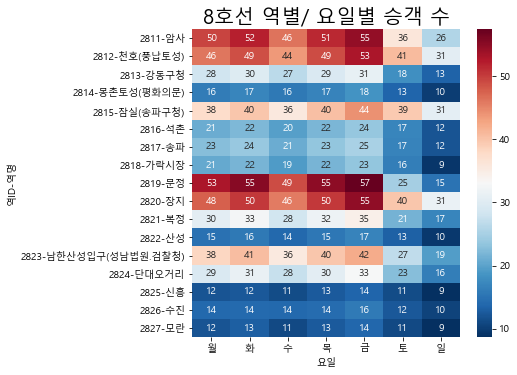

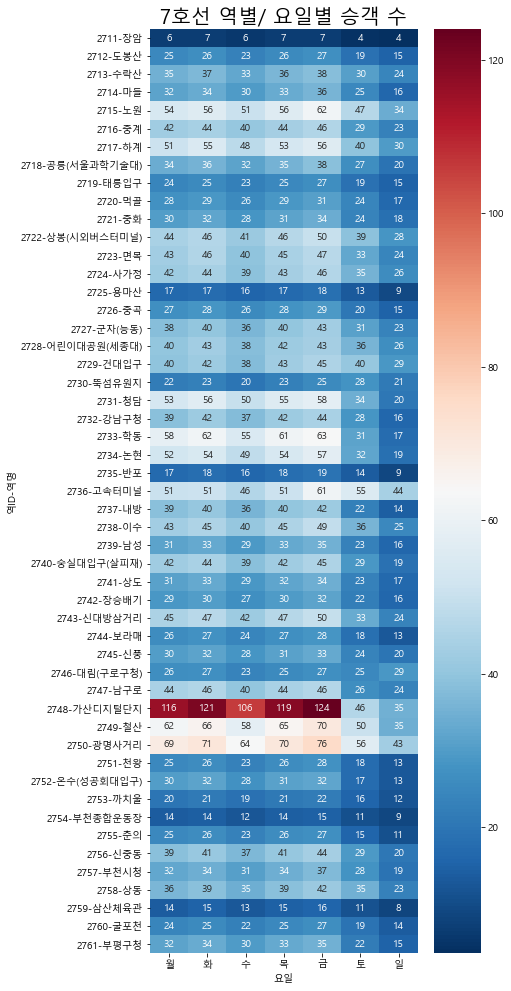

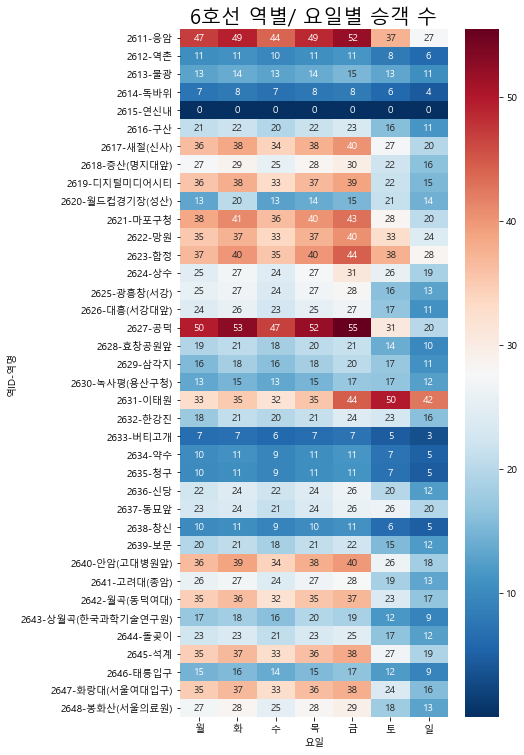

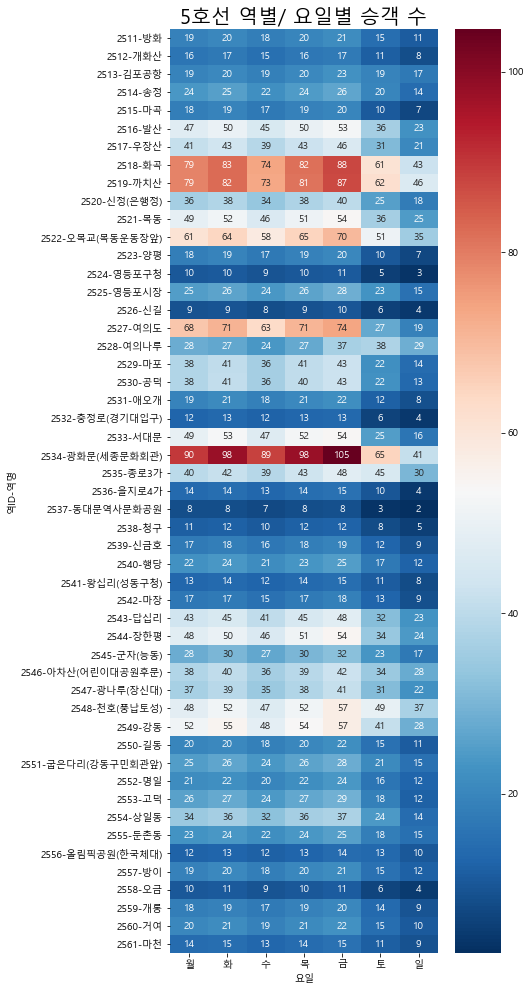

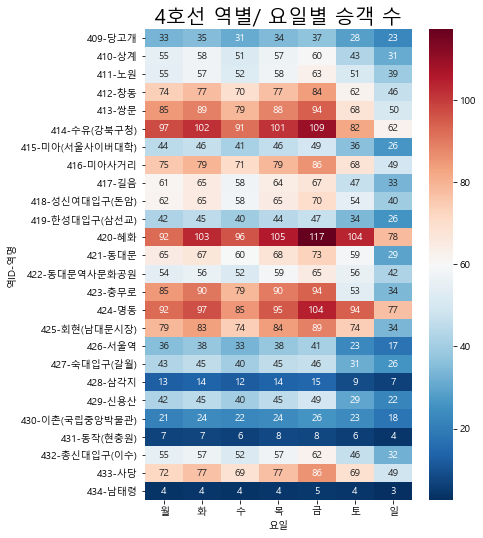

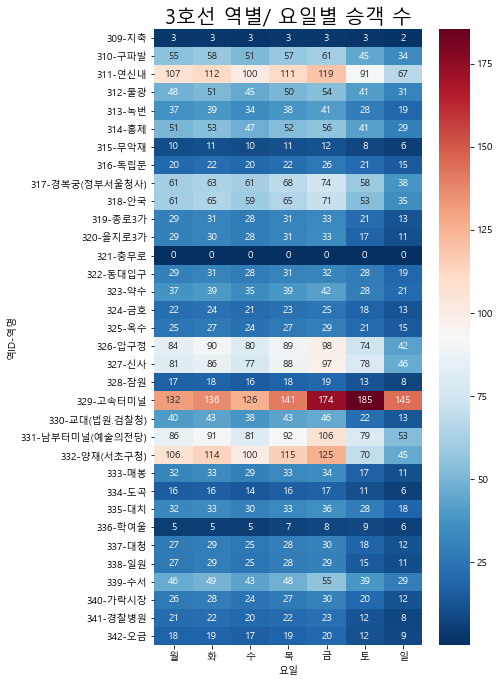

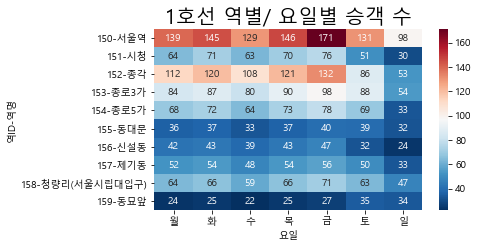

In [28]:
# 1호선 ~ 9호선 노선별 승객수 히트맵

for line in line_seoul_list:
    
    data_line = raw[raw['노선명'] == line]
    df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns = '요일',
                                    values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]
    df_pivot = df_pivot / 10000
    
    fig, ax = plt.subplots(figsize = (6, len(df_pivot) / 3))
    # 그래프 사이즈 조정. 역 수가 많은 경우는 세로로 길게 표시
    
    plt.title(f'{line} 역별/ 요일별 승객 수', fontsize = 20)
    
    sns.heatmap(df_pivot, cmap = 'RdBu_r', annot = True, fmt = '.0f')